In [1]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

# Лотка Вольтерра

In [2]:
params = dict()
params["a1"] = 2.
params["gamma1"] = 0.35
params["a2"] = 2.15
params["gamma2"] = 0.175

In [3]:
def Du(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ params["a1"]*x[0] -params["gamma1"]*x[0]*x[1] ,
                  -params["a2"]*x[1] + params["gamma2"]*x[0]*x[1] ])

In [4]:
t = np.linspace(0,20,1000)
x0 = np.array([10,10])
x, _ = integrate.odeint(Du,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

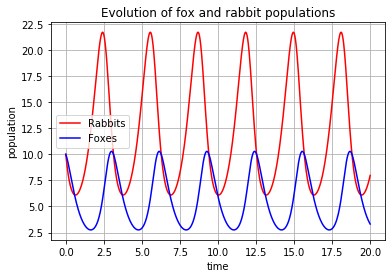

In [5]:
rabbits, foxes = x.T
f1 = plt.figure()
plt.plot(t,rabbits,'r-',label="Rabbits")
plt.plot(t,foxes,'b-',label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

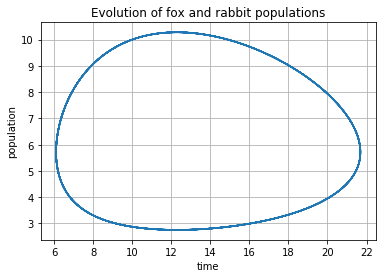

In [6]:
rabbits, foxes = x.T
f1 = plt.figure()
plt.plot(rabbits,foxes)
plt.grid()
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

# Логистическое поведение

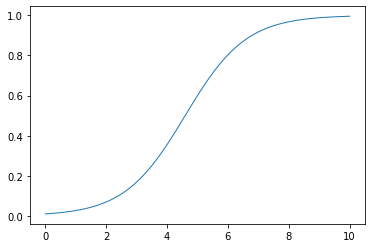

In [7]:
import numpy as np
import matplotlib.pyplot as plt

params["a"] = 1
params["b"] = 1
 # create function
def Du(u, t=0):
    return params["a"]*u-params["b"]*u**2;

t = np.linspace( 0, 10, 100) # vector of time
u0 = 0.01# start value
u = integrate.odeint(Du, u0, t) # solve eq.
u = np.array(u).flatten() 
plt.plot( t, u, linewidth=1) # graphic
plt.show() # display

# Взлет падение

In [8]:
def Du(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ -params["a1"]*x[0] +params["gamma1"]*x[0]*x[1] ,
                   -params["gamma2"]*x[0]*x[1] ])

In [9]:
t = np.linspace(0,10,100)
x0 = np.array([50,100])
x, _ = integrate.odeint(Du,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of eaters and resources populations')

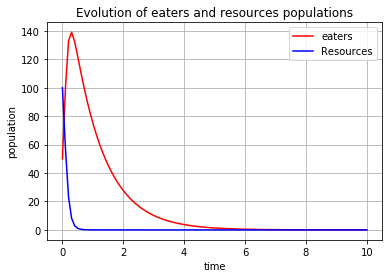

In [10]:
x1, x2 = x.T
f1 = plt.figure()
plt.plot(t,x1,'r-',label="eaters")
plt.plot(t,x2,'b-',label="Resources")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of eaters and resources populations')

# Параметрическая Идентификация

In [7]:
import scipy.optimize as opt

def observation(variance = 0.01,min_value=0,max_value= 10):
    obsU = []
    obsV = []
    delta = 0.01
    samples = int((max_value - min_value)/delta)
    for idx in range(0,samples):
        obsU.append(rabbits[idx] + np.random.normal(0,0.1))
        obsV.append(foxes[idx] + np.random.normal(0,0.1))
    t = np.linspace(2,7,samples)
    f1 = plt.figure()
    plt.plot(t,obsU,'r-',label='rabbits')
    plt.plot(t,obsV,'b-',label="foxes")
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('Evolution of eaters and resources populations')
    return obsU,obsV,samples

((300,), (300,), 300)

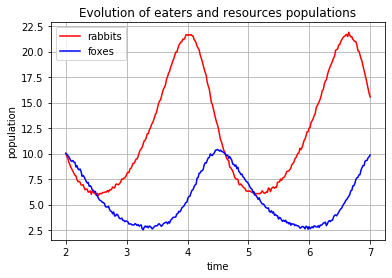

In [8]:
observRabbits,observFoxes,count = observation(2,7)
npRabbits,npFoxes = np.array(observRabbits),np.array(observFoxes)
npRabbits.shape,npFoxes.shape,count


In [9]:
def function(rabbits,foxes,theta):
    return rabbits * (theta[0]  - theta[1]*foxes), foxes*( -theta[2] + theta[3]*rabbits)


def trueFunction(rabbit,fox):
    return rabbit*(params["a1"] - params["gamma1"]*fox),fox*(-params["a2"] + params["gamma2"]*rabbit)

In [10]:
def square_error(theta,counts = count):
    estFunctions = [function(rabbit,fox,theta) for rabbit in npRabbits for fox in npFoxes]
    trueFunctions = [trueFunction(rabbit,fox) for rabbit in rabbits[:counts] for fox in foxes[:counts]]
    true_rabbits,true_foxes = np.array([fu[0] for fu in trueFunctions]), np.array([fu[1] for fu in trueFunctions])
    calc_rabbits,calc_foxes = np.array([fu[0] for fu in estFunctions]),np.array([fu[1] for fu in estFunctions])
    return ((calc_rabbits - true_rabbits)**2).sum() + ((calc_foxes - true_foxes)**2).sum()

In [56]:
theta0 = [4,0.3,0.75,0.0175]
res = opt.minimize(square_error,theta0,method='nelder-mead', options={'xatol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 249
         Function evaluations: 428


In [57]:
parameters  = res.x

In [58]:
def Du(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ parameters[0]*x[0] -parameters[1]*x[0]*x[1] ,
                  -parameters[2]*x[1] +parameters[3]*x[0]*x[1] ])

In [59]:
t = np.linspace(0,20,1000)
x0 = np.array([10,10])
x, _ = integrate.odeint(Du,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

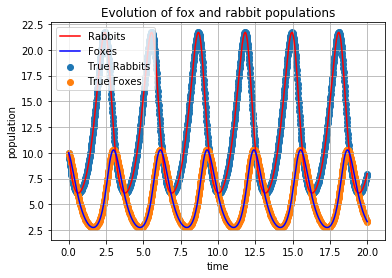

In [60]:
rabbits_c, foxes_c = x.T
f1 = plt.figure()
plt.scatter(t,rabbits,label="True Rabbits")
plt.scatter(t,foxes,label="True Foxes")
plt.plot(t,rabbits_c,'r-',label="Rabbits")
plt.plot(t,foxes_c,'b-',label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [61]:
print(parameters)

[2.00000002 0.35000001 2.1500004  0.17500002]


In [62]:
parameters,params

(array([2.00000002, 0.35000001, 2.1500004 , 0.17500002]),
 {'a1': 2.0, 'gamma1': 0.35, 'a2': 2.15, 'gamma2': 0.175})

In [66]:
result_1 = opt.minimize(square_error,theta0,method='powell', options={'xatol': 1e-6, 'disp': True})

C:\Users\Untr0nix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 200


In [68]:
result_1.x

array([2.   , 0.35 , 2.15 , 0.175])

In [69]:
result_1 = opt.minimize(square_error,theta0,method='powell', options={'xatol': 1e-6, 'disp': True})

C:\Users\Untr0nix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 200


In [70]:
result_1.x

array([2.   , 0.35 , 2.15 , 0.175])

In [12]:
theta0 = [5,1.3,0.95,0.0275]

In [83]:
%%time
result_1 = opt.minimize(square_error,theta0,method='powell', options={'xatol': 1e-6, 'disp': True})

C:\Users\Untr0nix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 20672.671157
         Iterations: 5
         Function evaluations: 269
Wall time: 2min 50s


In [81]:
result_1.x

array([1.99340081, 0.34868329, 2.1519091 , 0.17515457])

In [84]:
%%time
res = opt.minimize(square_error,theta0,method='nelder-mead', options={'xatol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 20672.671158
         Iterations: 245
         Function evaluations: 424
Wall time: 4min 33s


In [13]:
%%time 
result_gd = opt.minimize(square_error,theta0,method="cg",options={'xatol': 1e-6, 'disp': True})

C:\Users\Untr0nix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.


         Current function value: 22726.623314
         Iterations: 50
         Function evaluations: 832
         Gradient evaluations: 137
Wall time: 8min 50s


In [ ]:
%%time 
result_gd = opt.minimize(square_error,theta0,method="cg",options={'xatol': 1e-6, 'disp': True})

In [27]:
gdResults= result_gd.x

In [20]:
trueResults = np.array(list(params.values()),dtype=float)

In [28]:
print("original values:",trueResults)
print("predicted values:",gdResults)
print("abs error:",np.abs(trueResults - gdResults))

original values: [2.    0.35  2.15  0.175]
predicted values: [2.00437721 0.35059673 2.14879995 0.17502647]
abs error: [4.37720909e-03 5.96727731e-04 1.20004710e-03 2.64680957e-05]


In [ ]:
def Du_1(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ gdResults[0]*x[0] -gdResults[1]*x[0]*x[1] ,
                  -gdResults[2]*x[1] +gsResults[3]*x[0]*x[1] ])


In [29]:
t = np.linspace(0,20,1000)
x0 = np.array([10,10])
x, _ = integrate.odeint(Du,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

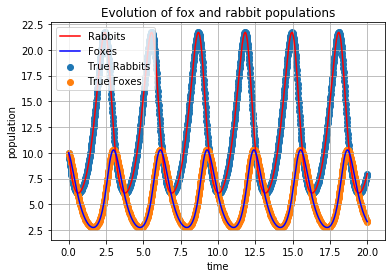

In [30]:
rabbits_gd, foxes_gd = x.T
f1 = plt.figure()
plt.scatter(t,rabbits,label="True Rabbits")
plt.scatter(t,foxes,label="True Foxes")
plt.plot(t,rabbits_gd,'r-',label="Rabbits")
plt.plot(t,foxes_gd,'b-',label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [31]:
print("error between functions u and u_pred:",np.abs(np.array(rabbits_gd)-np.array(rabbits)).sum())
print("error between functions u and u_pred:",np.abs(np.array(foxes_gd)-np.array(foxes)).sum())

error between functions u and u_pred: 0.0
error between functions u and u_pred: 0.0


In [35]:
%%time 
result_gd = opt.minimize(square_error,theta0,method="BFGS",options={'xatol': 1e-6, 'disp': True})

C:\Users\Untr0nix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.


         Current function value: 22726.623296
         Iterations: 9
         Function evaluations: 492
         Gradient evaluations: 80
Wall time: 5min 6s


Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

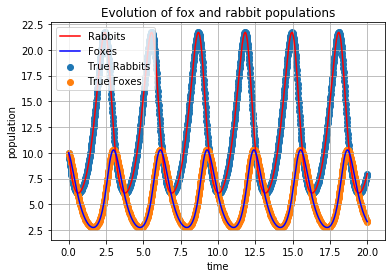

In [36]:
rabbits_bfgs, foxes_bfgs = x.T
f1 = plt.figure()
plt.scatter(t,rabbits,label="True Rabbits")
plt.scatter(t,foxes,label="True Foxes")
plt.plot(t,rabbits_bfgs,'r-',label="Rabbits")
plt.plot(t,foxes_bfgs,'b-',label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [37]:
print("error between functions u and u_pred:",np.abs(np.array(rabbits_bfgs)-np.array(rabbits)).sum())
print("error between functions u and u_pred:",np.abs(np.array(foxes_bfgs)-np.array(foxes)).sum())

error between functions u and u_pred: 0.0
error between functions u and u_pred: 0.0
